# Criminal San Francisco

In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('criminal_san_francisco.csv')
df

,Unnamed: 0,Unnamed: 0.1,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,X,Y
0,0,0,2010-10-18 13:37:00,ASSAULT,BATTERY,Monday,SOUTHERN,NONE,-122.407376,37.779989
1,1,1,2013-01-11 03:21:00,ASSAULT,AGGRAVATED ASSAULT WITH A DEADLY WEAPON,Friday,TENDERLOIN,NONE,-122.412437,37.783486
2,2,2,2004-03-31 15:00:00,ASSAULT,BATTERY,Wednesday,INGLESIDE,JUVENILE ADMONISHED,-122.451164,37.745564
3,3,3,2005-02-27 22:33:00,ASSAULT,THREATS AGAINST LIFE,Sunday,INGLESIDE,NONE,-122.428614,37.722765
4,4,4,2013-06-30 17:39:00,ASSAULT,BATTERY,Sunday,MISSION,NONE,-122.418449,37.753027
...,...,...,...,...,...,...,...,...,...,...
89995,89995,89995,2005-05-21 17:55:00,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Saturday,TARAVAL,"ARREST, BOOKED",-122.451157,37.716582
89996,89996,89996,2006-06-13 14:14:00,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Tuesday,CENTRAL,"ARREST, BOOKED",-122.407562,37.798678
89997,89997,89997,2004-12-08 20:20:00,WARRANTS,WARRANT ARREST,Wednesday,INGLESIDE,"ARREST, BOOKED",-122.417108,37.712256
89998,89998,89998,2009-11-11 07:40:00,WARRANTS,WARRANT ARREST,Wednesday,MISSION,"ARREST, BOOKED",-122.420010,37.770110


In [4]:
df.Category.nunique()

9

In [5]:
df.Resolution.nunique()

17

In [6]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Dates', 'Category', 'Descript',
       'DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y'],
      dtype='object')

In [7]:
df.drop(columns=['Unnamed: 0','Unnamed: 0.1','Dates'],axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Category    90000 non-null  object 
 1   Descript    90000 non-null  object 
 2   DayOfWeek   90000 non-null  object 
 3   PdDistrict  90000 non-null  object 
 4   Resolution  90000 non-null  object 
 5   X           90000 non-null  float64
 6   Y           90000 non-null  float64
dtypes: float64(2), object(5)
memory usage: 4.8+ MB


In [9]:
from sklearn import preprocessing 
encoder= preprocessing.LabelEncoder()
encoder.fit(df.Category)
df.Category=encoder.transform(df.Category)
encoder.fit(df.Descript)
df.Descript=encoder.transform(df.Descript)
encoder.fit(df.DayOfWeek)
df.DayOfWeek=encoder.transform(df.DayOfWeek)
encoder.fit(df.PdDistrict)
df.PdDistrict=encoder.transform(df.PdDistrict)
encoder.fit(df.Resolution)
df.Resolution=encoder.transform(df.Resolution)

In [10]:
df

,Category,Descript,DayOfWeek,PdDistrict,Resolution,X,Y
0,0,63,1,7,11,-122.407376,37.779989
1,0,4,0,9,11,-122.412437,37.783486
2,0,63,6,2,6,-122.451164,37.745564
3,0,264,3,2,11,-122.428614,37.722765
4,0,63,3,3,11,-122.418449,37.753027
...,...,...,...,...,...,...,...
89995,8,89,2,8,0,-122.451157,37.716582
89996,8,89,5,1,0,-122.407562,37.798678
89997,8,289,6,2,0,-122.417108,37.712256
89998,8,289,6,3,0,-122.420010,37.770110


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Category    90000 non-null  int32  
 1   Descript    90000 non-null  int32  
 2   DayOfWeek   90000 non-null  int32  
 3   PdDistrict  90000 non-null  int32  
 4   Resolution  90000 non-null  int32  
 5   X           90000 non-null  float64
 6   Y           90000 non-null  float64
dtypes: float64(2), int32(5)
memory usage: 3.1 MB


In [125]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df,test_size=0.3,random_state=2)
X_train=df_train.drop(columns='Category',axis=1)
Y_train=df_train['Category']
X_test=df_test.drop(columns='Category',axis=1)
Y_test=df_test['Category']

In [126]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(max_depth=3).fit(X_train,Y_train)
y_pred=clf.predict(X_train)
print(y_pred)
print(clf.score(X_test, Y_test))

[0 7 7 ... 4 7 8]
0.6574074074074074


In [127]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"], "max_iter":[10,50,100,500]}
grid = {'criterion':['gini', 'entropy'],'max_depth': [2,4,6,8,10,12]}
clf_cv=GridSearchCV(clf,grid, cv=5)
clf_cv.fit(X_train,Y_train)
print("tuned hpyerparameters :(best parameters) ",clf_cv.best_params_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 12}


In [128]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10).fit(X_train, Y_train)
print(clf.score(X_test, Y_test))

0.9998888888888889


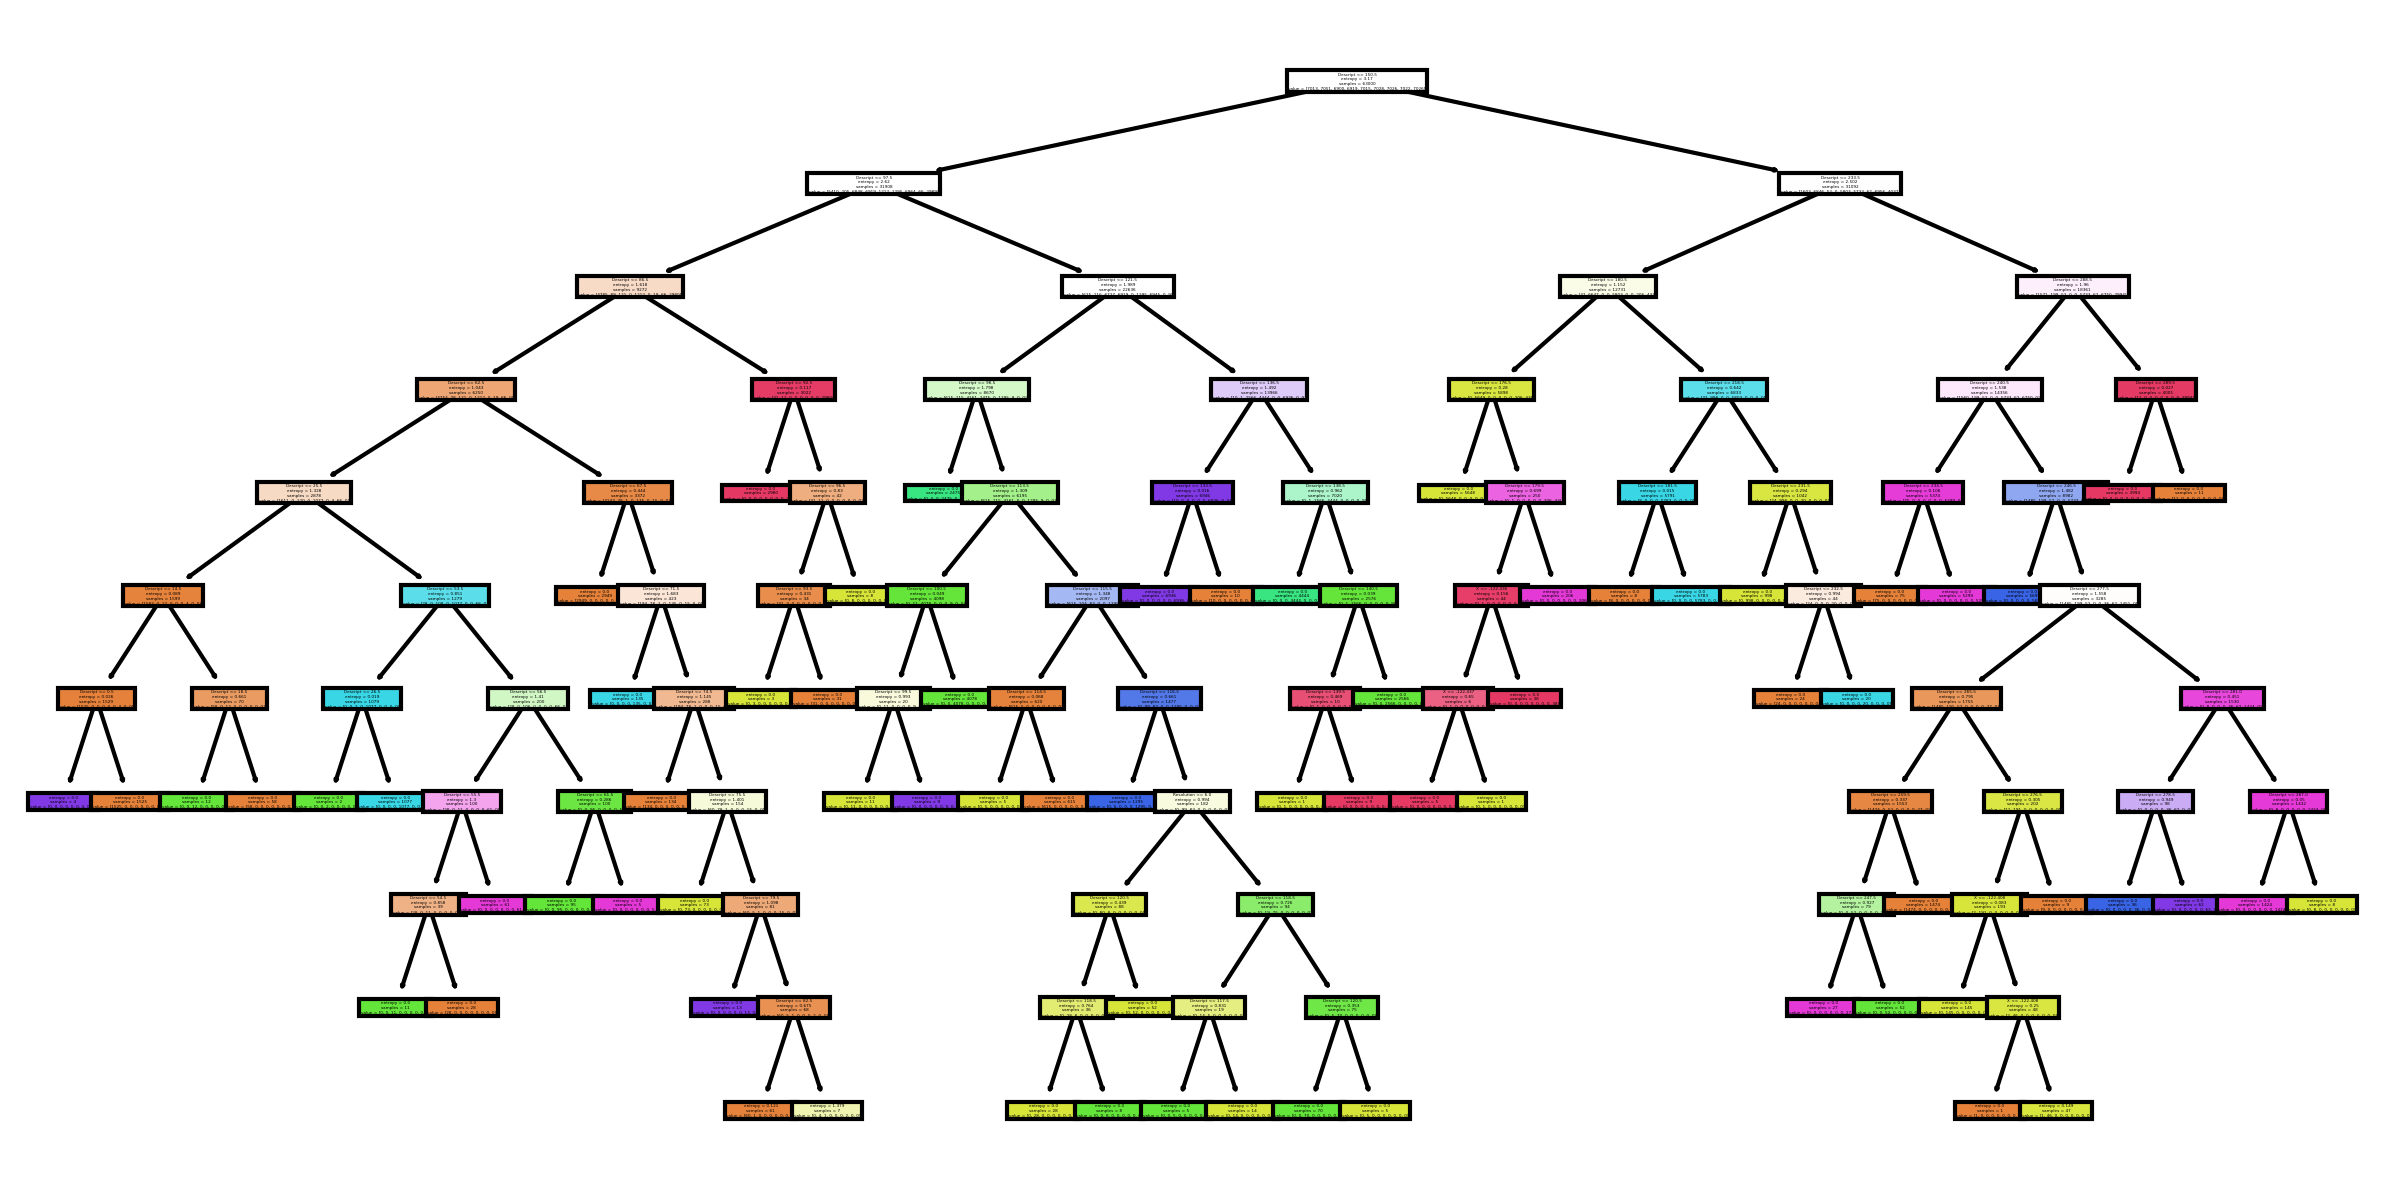

In [129]:
import matplotlib.pyplot as plt
from sklearn import tree
fig,ax= plt.subplots(nrows=1,ncols=1,figsize =(10,5),dpi=300)
tree.plot_tree(clf,feature_names = X_train.columns, filled = True)
plt.show()

In [130]:
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore")

kf = KFold(n_splits=5)
scores = []
for train_index, test_index in kf.split(df.drop(columns='Category',axis=1)):
    X_train, X_test = df.drop(columns='Category',axis=1).iloc[train_index], df.drop(columns='Category',axis=1).iloc[test_index]
    y_train, y_test = df['Category'].iloc[train_index], df['Category'].iloc[test_index]
    grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"], "max_iter":[10,50,100,500]}
    grid = {'criterion':['gini', 'entropy'],'max_depth': [2,4,6,8,10,12]}
    clf = tree.DecisionTreeClassifier()

    clf_cv=GridSearchCV(clf,grid, cv=5)
    clf_cv.fit(X_train,y_train)
    print("tuned hpyerparameters :(best parameters) ",clf_cv.best_params_)
    clf = tree.DecisionTreeClassifier(criterion=clf_cv.best_params_['criterion'], max_depth=clf_cv.best_params_['max_depth']).fit(X_train, y_train)
    s = clf.score(X_test, y_test)
    print(s)
    scores.append(s)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 10}
0.44383333333333336
tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 12}
0.44433333333333336
tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 12}
0.4444444444444444
tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 12}
0.4444444444444444
tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 12}
0.444


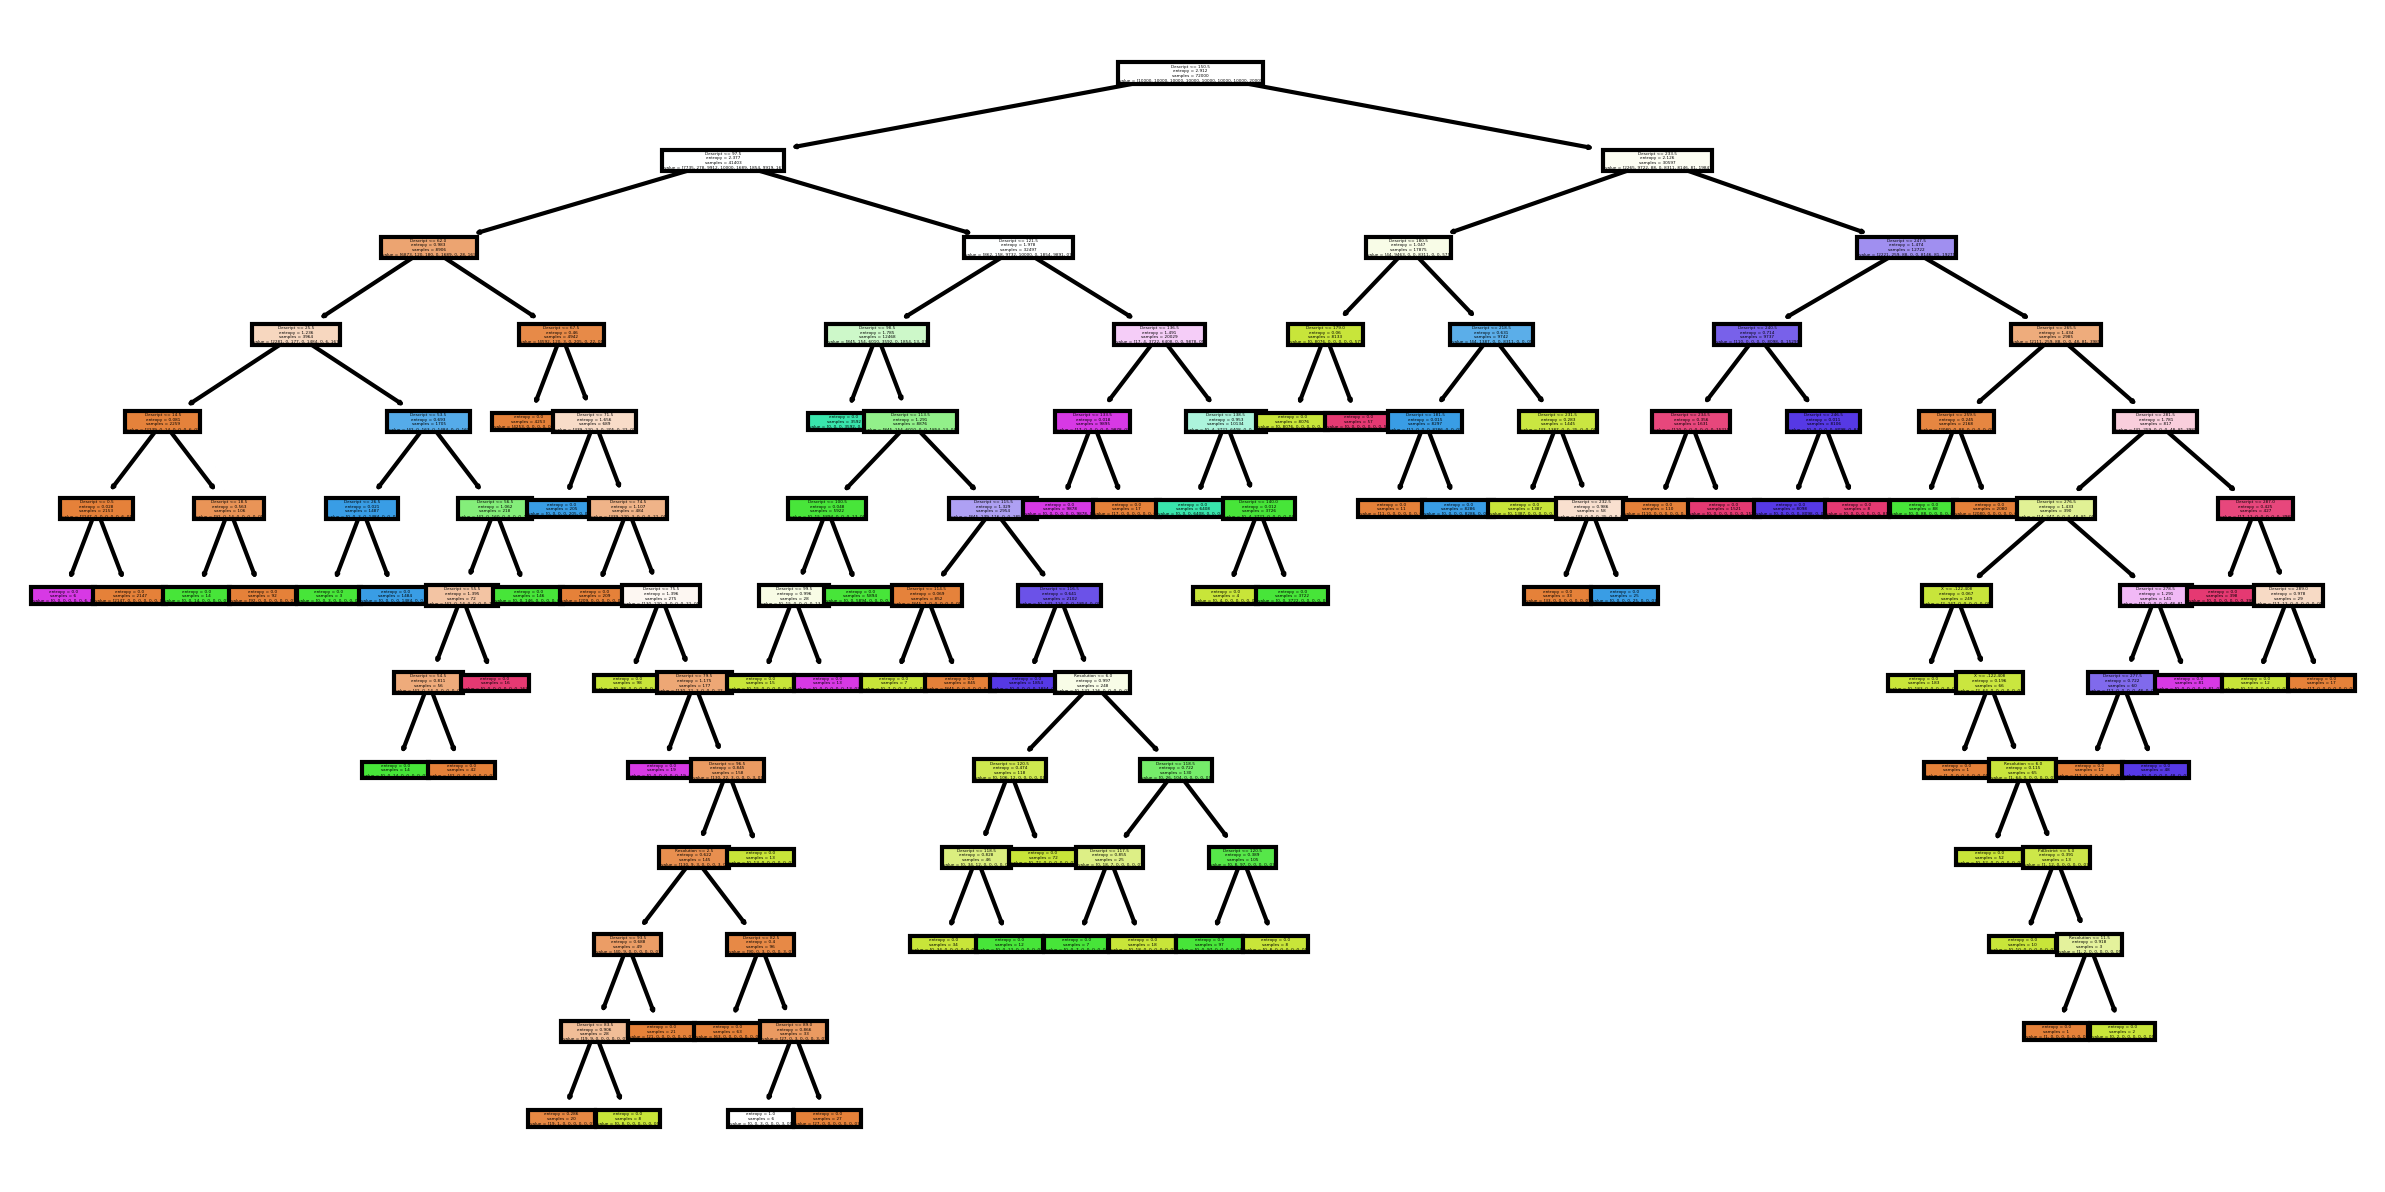

In [131]:
import matplotlib.pyplot as plt
from sklearn import tree
fig,ax= plt.subplots(nrows=1,ncols=1,figsize =(10,5),dpi=300)
tree.plot_tree(clf,feature_names = X_train.columns, filled = True)
plt.show()

In [132]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)
scores1 = []
for train_index, test_index in skf.split(df.drop(columns='Category',axis=1),df['Category']):
    X_train, X_test = df.drop(columns='Category',axis=1).iloc[train_index], df.drop(columns='Category',axis=1).iloc[test_index]
    y_train, y_test = df['Category'].iloc[train_index], df['Category'].iloc[test_index]
    grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"], "max_iter":[10,50,100,500]}
    
    grid = {'criterion':['gini', 'entropy'],'max_depth': [2,4,6,8,10,12]}
    clf = tree.DecisionTreeClassifier()

    clf_cv=GridSearchCV(clf,grid)
    clf_cv.fit(X_train,y_train)
    print("tuned hpyerparameters :(best parameters) ",clf_cv.best_params_)
    clf = tree.DecisionTreeClassifier(criterion=clf_cv.best_params_['criterion'], max_depth=clf_cv.best_params_['max_depth']).fit(X_train, y_train)
    s = clf.score(X_test, y_test)
    print(s)
    scores1.append(s)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 12}
0.9998888888888889
tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 10}
0.9998333333333334
tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 10}
0.9998888888888889
tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 12}
0.9997777777777778
tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 12}
0.9998333333333334


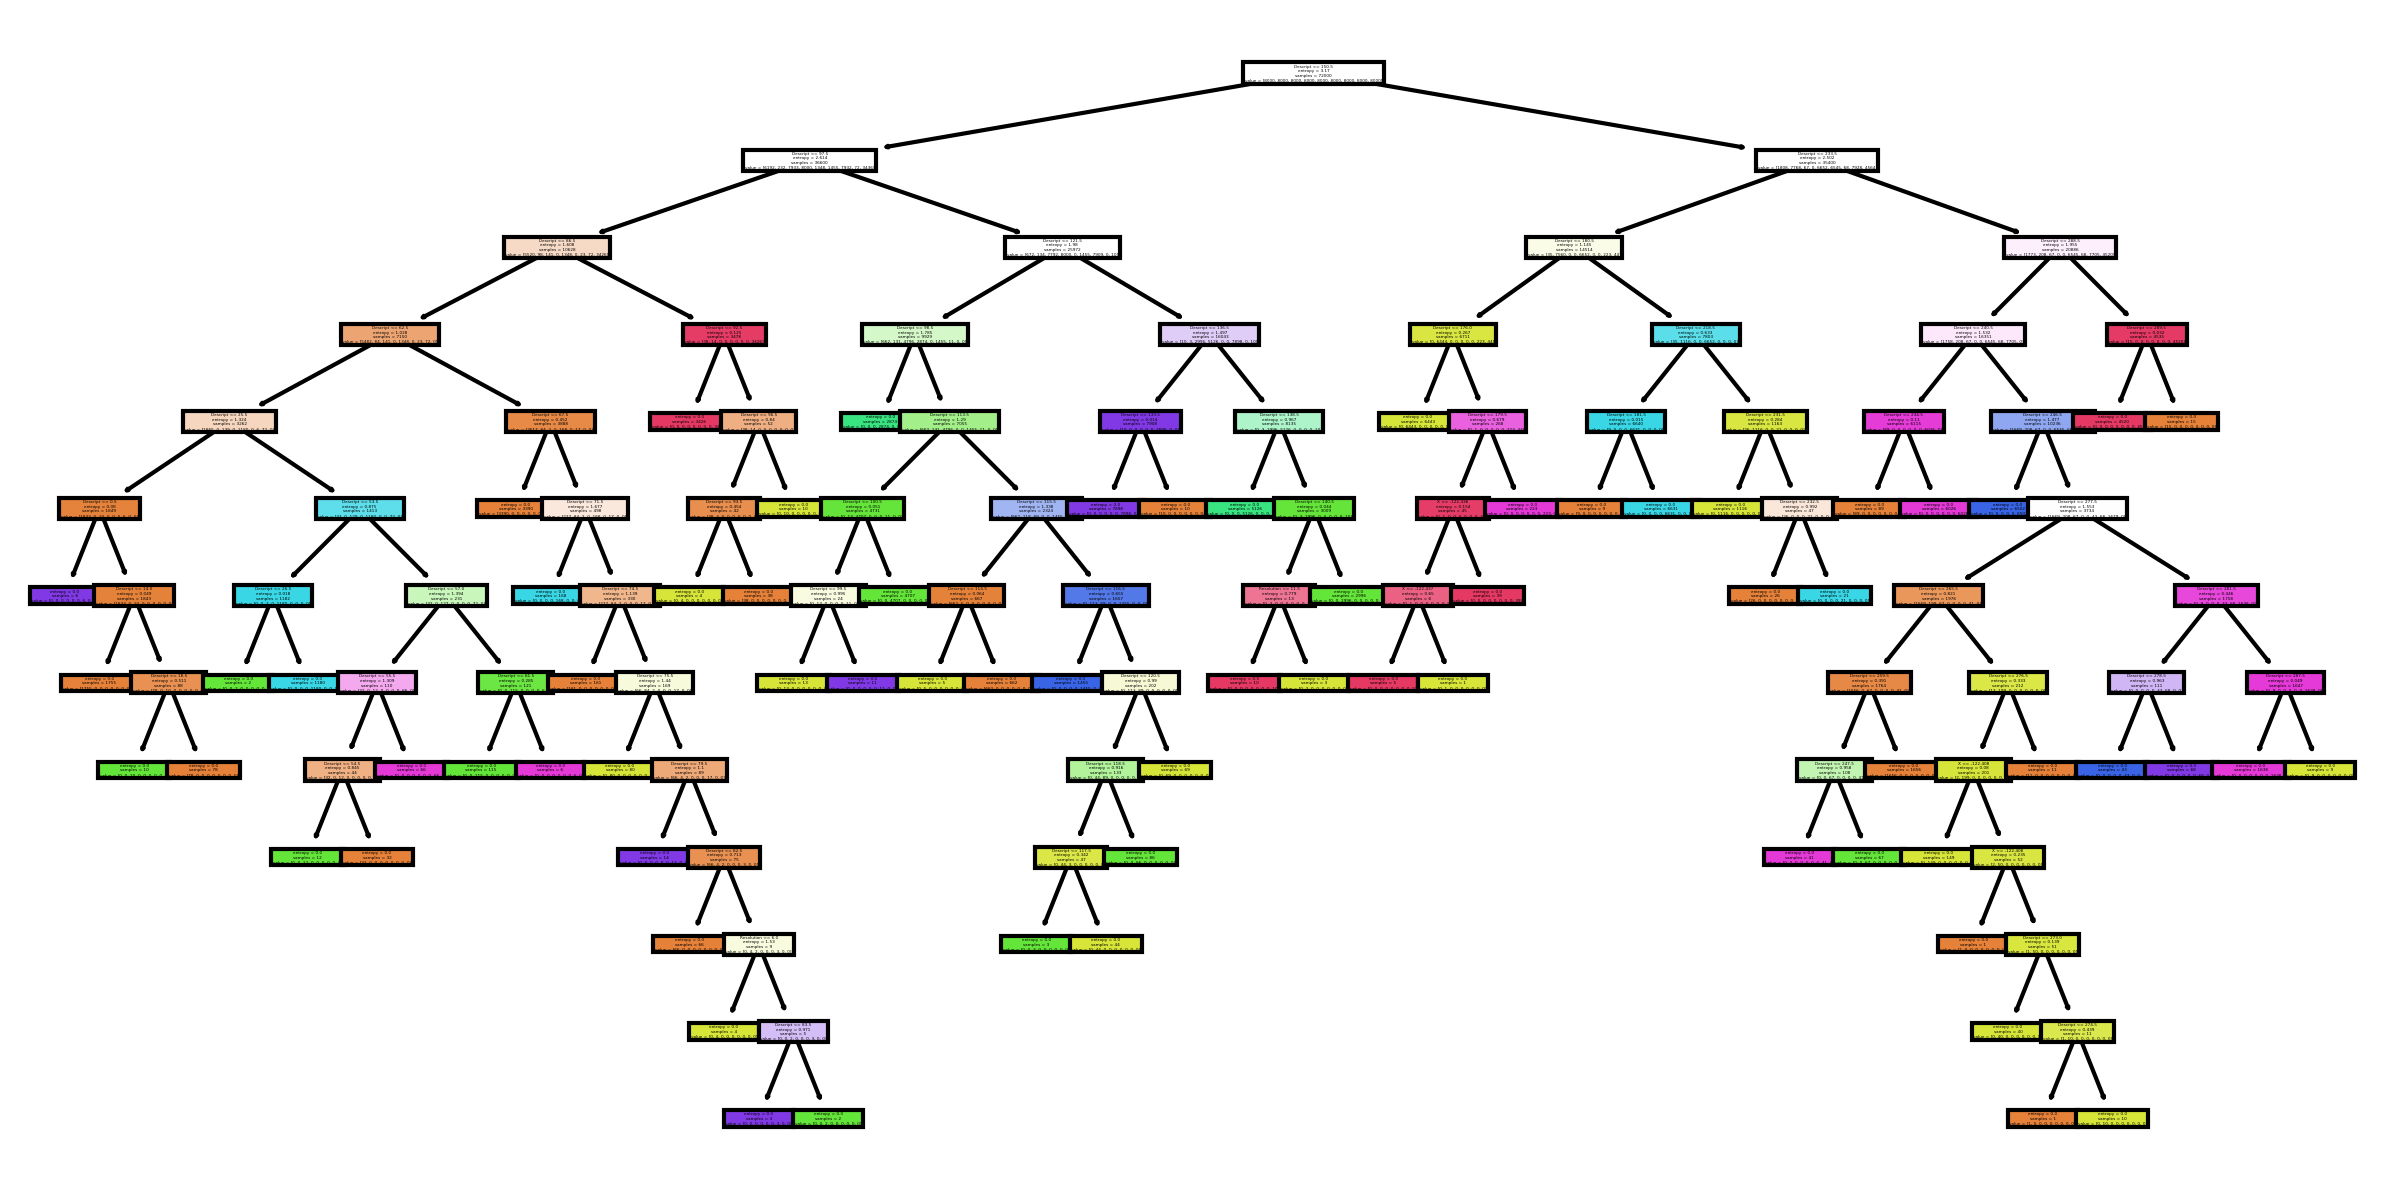

In [133]:
import matplotlib.pyplot as plt
from sklearn import tree
fig,ax= plt.subplots(nrows=1,ncols=1,figsize =(10,5),dpi=300)
tree.plot_tree(clf,feature_names = X_train.columns, filled = True)
plt.show()